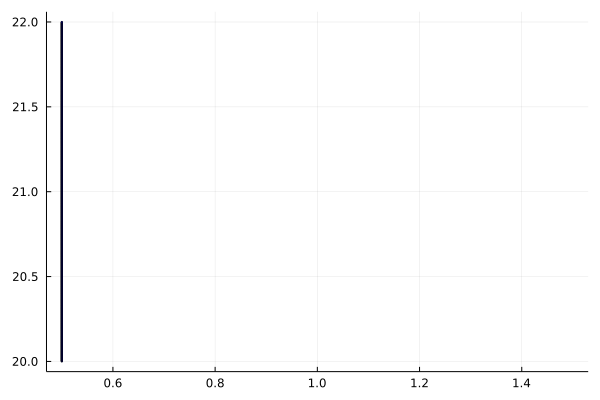

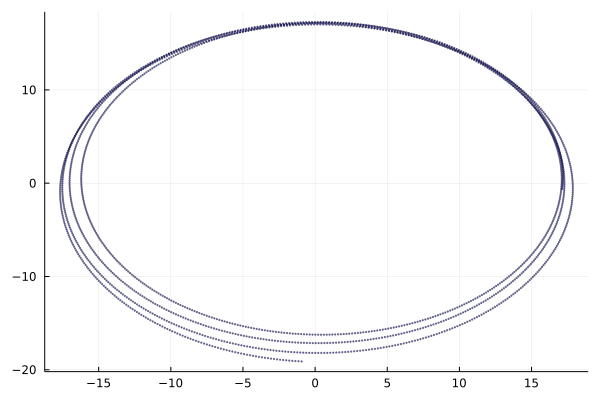

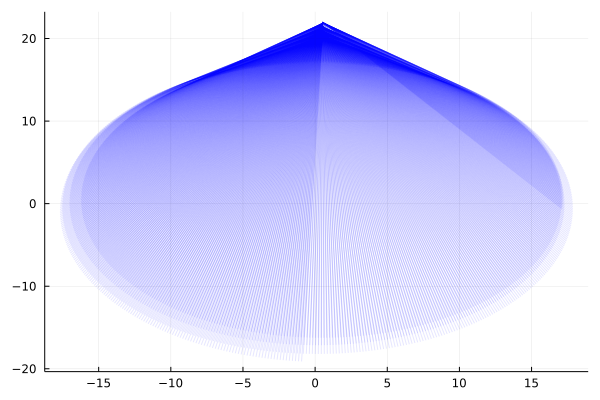

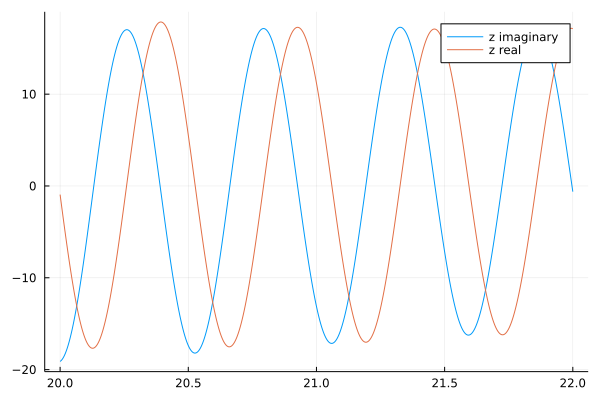

In [51]:
# primes operations open source Keith Reid Cailleach Computing 2022

# is there a complex analogy to primeness
# Test Driven Development
# clear sections alphabetically - only exception is when working a real,imaginary

using Plots
using Test

# s1 get a

function get_re_inputmin()
    re_inputmin::Float64 = 0.5
    return re_inputmin
end
function get_im_inputmin()
    im_inputmin::Float64 = 20
    return im_inputmin
end

function get_re_inputmax()
    re_inputmax::Float64 = 0.5
    return re_inputmax
end
function get_im_inputmax()
    im_inputmax::Float64 = 22
    return im_inputmax
end

function get_step()
    step::Float64        = 0.001
    return step
end

function get_terms()
    terms::Int64         = 2^17
    return terms
end

function build_input_field()
    re_inputmin::Float64     = get_re_inputmin()
    im_inputmin::Float64     = get_im_inputmin()
    re_inputmax::Float64     = get_re_inputmax()
    im_inputmax::Float64     = get_im_inputmax()
    step::Float64            = get_step()
    input_field::Vector{Complex{Float64}} = []
    for real in re_inputmin:step:re_inputmax
        for imag in im_inputmin:step:im_inputmax
            this_complex = complex(real, imag)
            append!(input_field, this_complex)
        end
    end
    return input_field
end

function zeta(s)    
    ζ = 0
    terms::Int64 = get_terms()
    for n in 1:terms
        contribution = 1/(n^s)
        ζ            = ζ + contribution
    end
    return ζ
end

function draw_input(input_field::Vector{Complex{Float64}})
    graph = scatter(legend=false)
    for c in input_field
        scatter!([c.re],[c.im], color="blue", markersize=1, alpha=0.5)
    end
    return graph
end

function draw_output(output_field::Vector{Complex{Float64}})
    graph = scatter(legend=false)
    for c in output_field
        scatter!([c.re],[c.im], color="blue", markersize=1, alpha=0.5)
    end
    return graph
end

function draw_vector_graph(input_field::Vector{Complex{Float64}},
                          output_field::Vector{Complex{Float64}})
    graph = plot(legend=false)
    for i in 1:length([x for x in output_field])
        from_x = input_field[i].re
        to_x   = output_field[i].re
        from_y = input_field[i].im
        to_y   = output_field[i].im
        plot!([from_x,to_x],[from_y,to_y],color="blue",alpha=0.1)
    end
    return graph
end

function main()
    # expect nontrivial zeros at 
    # Re(s) = 1/2
    # Im(s) = ±14.135, ±21.022 and ±25.011
    
    input_field  = build_input_field()
    output_field = map((x) -> zeta(x), input_field)
    in_graph     = draw_input(input_field)
    out_graph    = draw_output(output_field)
    vector_graph = draw_vector_graph(input_field, output_field)
    
    display(in_graph)
    display(out_graph)
    display(vector_graph)
    
    #abs_graph = plot( [c.im for c in input_field],[abs(c) for c in output_field], markersize=1, label="z absolute")
    abs_graph = plot([c.im for c in input_field],[c.im for c in output_field],   markersize=1, label="z imaginary", plot=:rad2deg)
    abs_graph = plot!([c.im for c in input_field],[c.re for c in output_field],   markersize=1, label="z real", plot=:rad2deg)
    
    display(abs_graph)
end

main()

In [44]:
    
function test_build_input_field()
    input_field = build_input_field()
    @test typeof(input_field) == Vector{Complex{Float64}}
    println("passed build input field")
    
end

function test_get_im_inputmin()
    im_inputmin = get_im_inputmin()
    @test typeof(im_inputmin) == Float64
    println("passed get im inputmin")
end


function test_get_im_inputmax()
    im_inputmax = get_im_inputmax()
    @test typeof(im_inputmax) == Float64
    println("passed get im inputmax")
end

function test_get_re_inputmin()
    re_inputmin = get_re_inputmin()
    @test typeof(re_inputmin) == Float64
    println("passed get re inputmin")
end

function test_get_re_inputmax()
    re_inputmax = get_re_inputmax()
    @test typeof(re_inputmax) == Float64
    println("passed get re inputmax")
end

function test_()
    println("passed test_")
end

function tests()
    test_get_im_inputmin()
    test_get_im_inputmax()
    test_get_re_inputmin()
    test_get_re_inputmax()
    test_build_input_field()
    println("passed all tests")
end

tests()

passed get im inputmin
passed get im inputmax
passed get re inputmin
passed get re inputmax
passed build input field
passed all tests
